# Introduction

I chose the housing price dataset for ML Project that was sourced from Kaggle and Github. This dataset contains house sale prices of King County, Seattle, USA. It includes homes sold between May 2014 and May 2015. It has many characteristics of learning. This Housing Price Data consists of 21613 Rows & 21 columns. 

The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable? (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable? These regression estimates & are used to explain the relationship between one dependent variable and one or more independent variables.

# Description

This dataset includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

By observing the data, we can know that the price is dependent on various features like bedrooms(which is most dependent feature), bathrooms, sqft_living(second most important feature), sqft_lot, floors etc. The price is also dependent on the location of the house where it is present and other features like waterfront & view are less dependent on the price. From all these records, there are no missing values which helps us creating better model.

### Here're columns description given as below :-

1. ID : Its basically unique ID's
2. Date : Date of selling house
3. Price : House Price as per built-up year, Floor, Living & other area 
4. Bedrooms : total nos. of bedrooms
5. Bathrooms : total nos. of Bathrooms
6. sqft_living : living space area
7. sqft_lot : total landspace area (Living +front +backyard area)
8. floors : on which floor, house is located
9. waterfront : whether there is waterfall view
10. view : its all about view of house 
11. condition : how much old is this which has been defined in between 1 to 5.
12. grade : this has been defined in between 1 to 13 on the basis of house condition
13. sqft_Above : living area space
14. sqft_basement : parking area space
15. yr_built : when this house was built
16. yr_renovated : when this was renovated again if it was being renovated
17. zipcode : area pin code of this house
18. lat : latitude of house location
19. long : longitude of house location
20. sqft_living15 : after renovation in 2015, living area space
21. sqft_lot15 : after renovation in 2015, total landspace area

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

## Upload King County's Data

In [2]:
data = pd.read_csv(r"C:/Users/ASUS/Desktop/ML Project/house-price-prediction-master/kc_house_data.csv")

## Pre-processing & EDA

In [3]:
data.shape

(21613, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
data['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [9]:
data.groupby(['condition'])['price'].value_counts()

condition  price    
1          125000.0     2
           78000.0      1
           81000.0      1
           105500.0     1
           130000.0     1
           142000.0     1
           150000.0     1
           190000.0     1
           196000.0     1
           210000.0     1
           227000.0     1
           235000.0     1
           252000.0     1
           255000.0     1
           270000.0     1
           295000.0     1
           305000.0     1
           352950.0     1
           365000.0     1
           380000.0     1
           427000.0     1
           432500.0     1
           441000.0     1
           445000.0     1
           535000.0     1
           550000.0     1
           575000.0     1
           658000.0     1
           1500000.0    1
2          170000.0     4
                       ..
5          1800000.0    1
           1855000.0    1
           1970000.0    1
           1989000.0    1
           1990000.0    1
           2005000.0    1
           202700

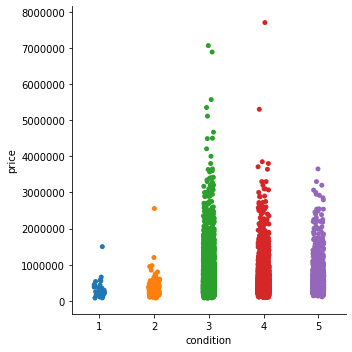

In [10]:
#catplot for condition and price
sns.catplot(x='condition',y='price',data=data)

In [11]:
data['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

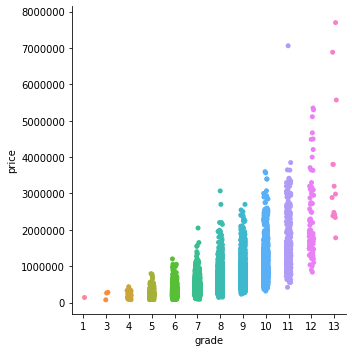

In [12]:
#catplot for condition and price
sns.catplot(x='grade',y='price',data=data)

In [13]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Text(0, 0.5, 'count')

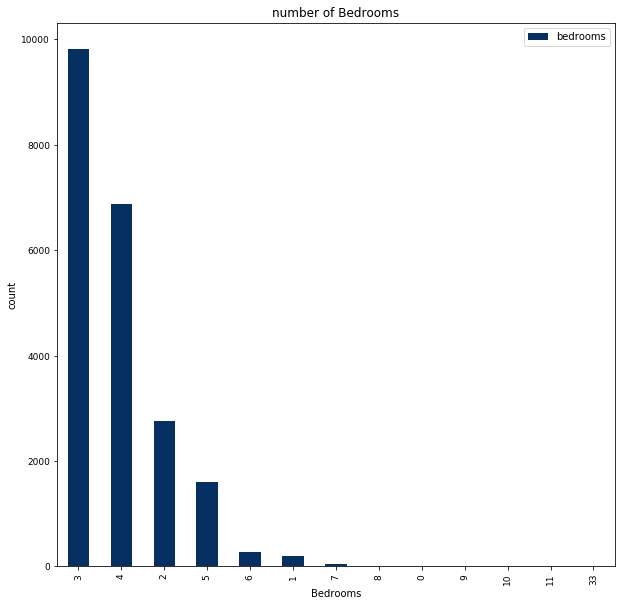

In [14]:
data['bedrooms'].value_counts().plot(kind='bar', fontsize=9, figsize=(10,10), legend=True, cmap='RdBu_r')
plt.title('number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('count')

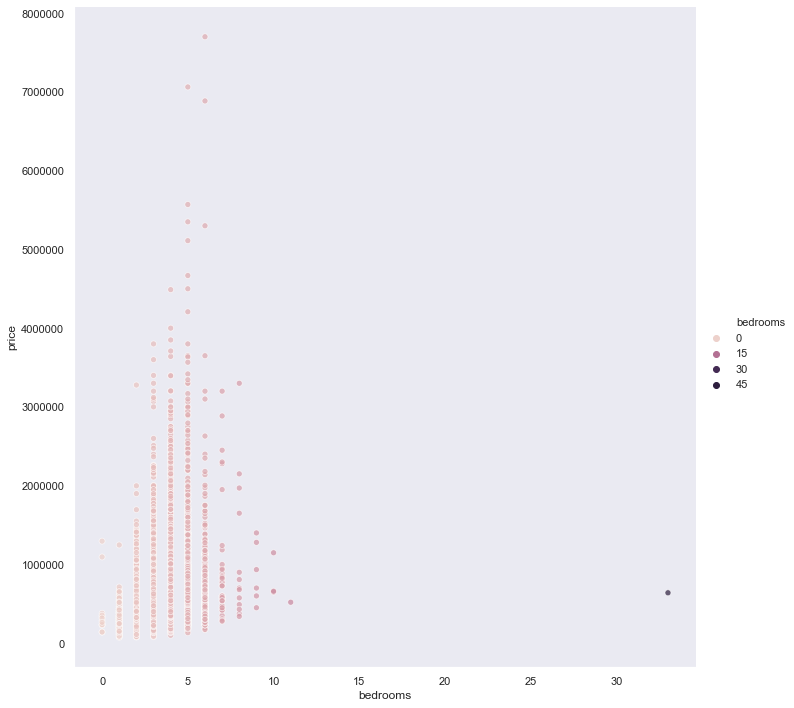

In [15]:
#replot for bedrooms and price
sns.set(style='dark')
sns.relplot(x='bedrooms',y='price',hue='bedrooms',alpha=0.7,height=10,data=data)

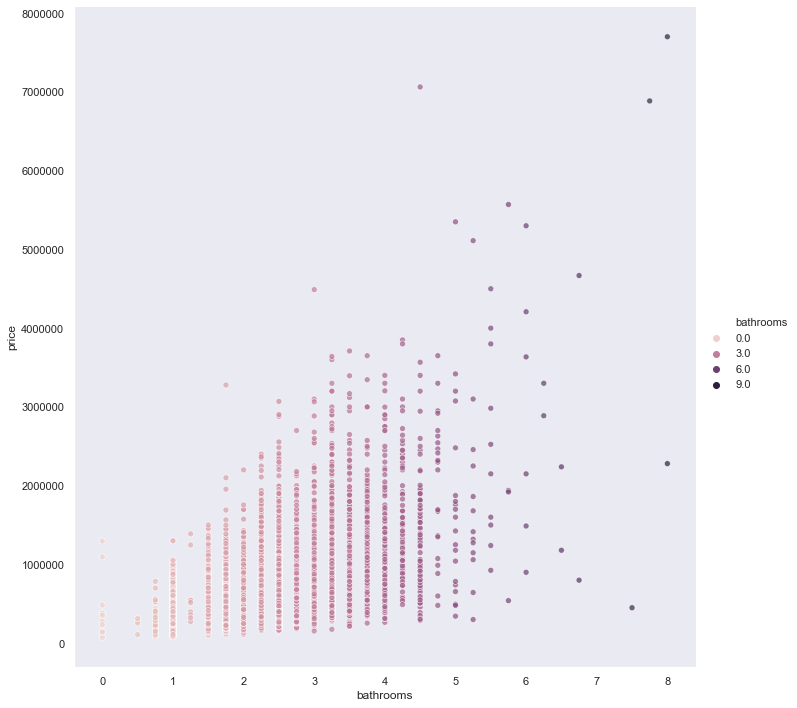

In [16]:
sns.set(style='dark')
sns.relplot(x='bathrooms',y='price',hue='bathrooms',alpha=0.7,height=10,data=data)

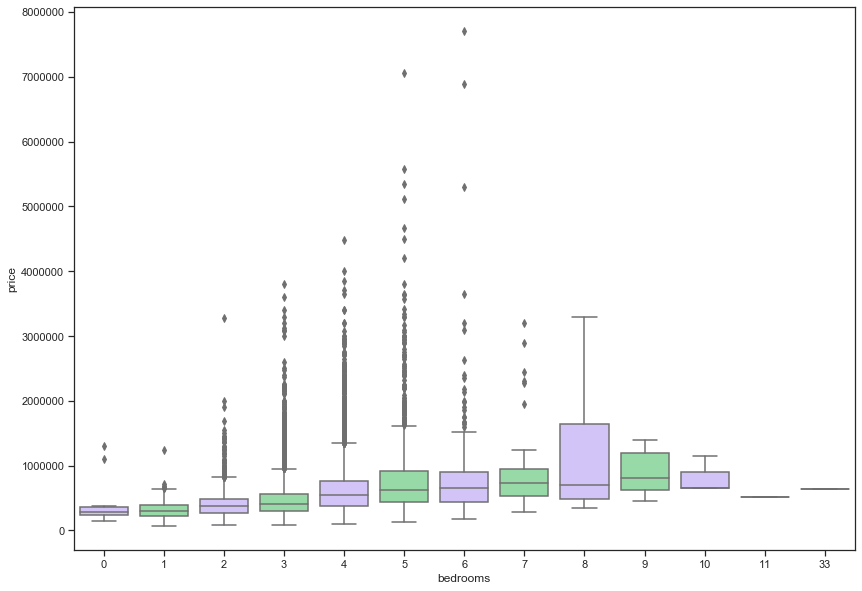

In [17]:
#plot boxplot graph for bedrooms and price
sns.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10)) 
sns.boxplot(x='bedrooms',y='price',palette=["m", "g"], data=data,ax=ax)

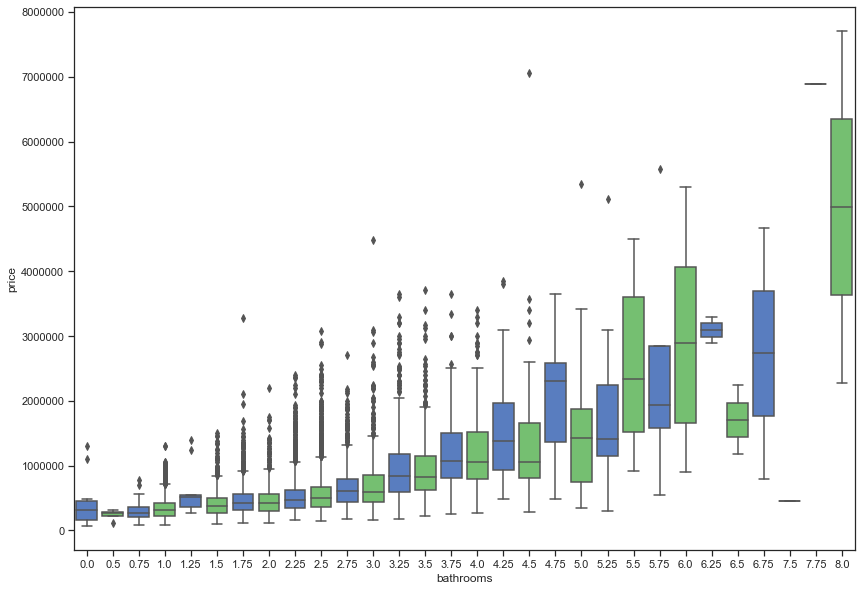

In [18]:
#boxplot between bathrooms and price
sns.set(style='ticks',palette='muted')
fig,ax=plt.subplots(figsize=(14,10))
sns.boxplot(x='bathrooms',y='price',palette=["b", "g"],data=data,ax=ax)

Text(0.5, 1.0, 'Price vs Square Feet')

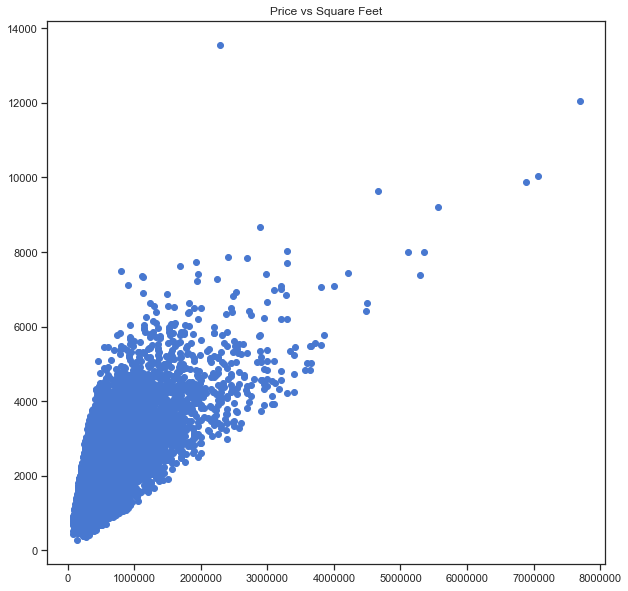

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(data.price, data.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Sqft_living15')

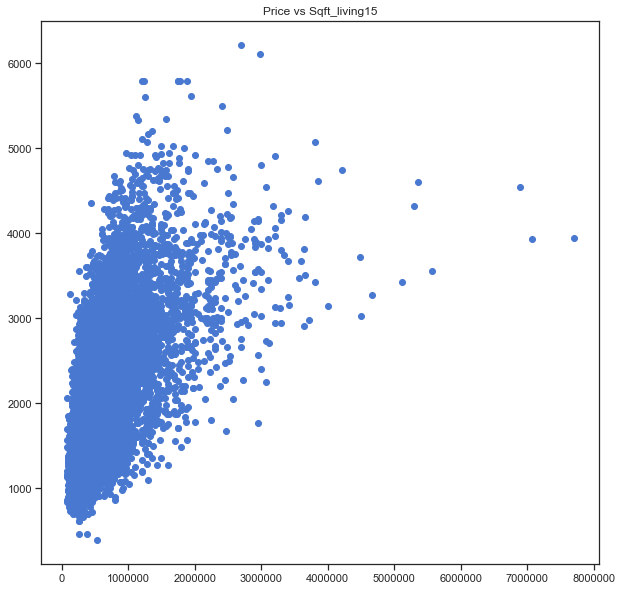

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(data.price, data.sqft_living15)
plt.title("Price vs Sqft_living15")

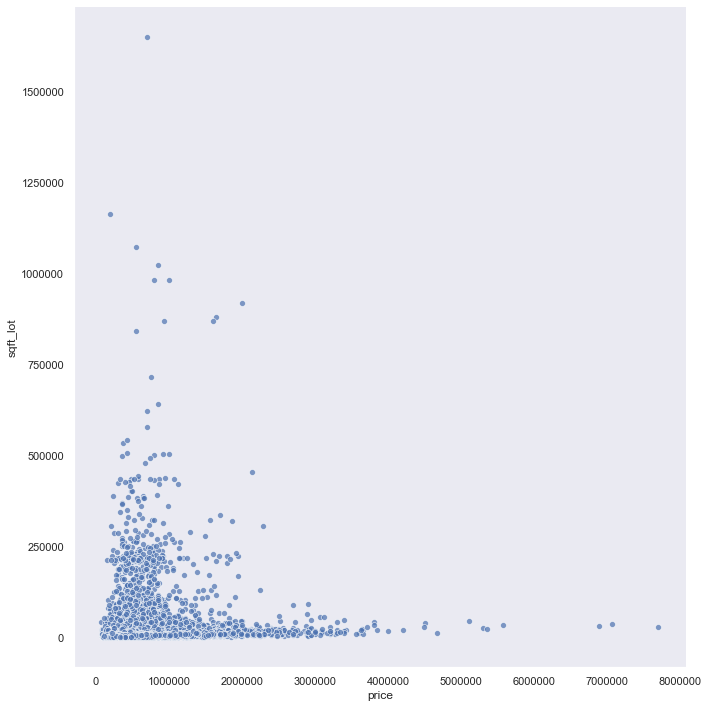

In [21]:
sns.set(style='dark')
sns.relplot(x='price',y='sqft_lot',alpha=0.7,height=10,data=data)

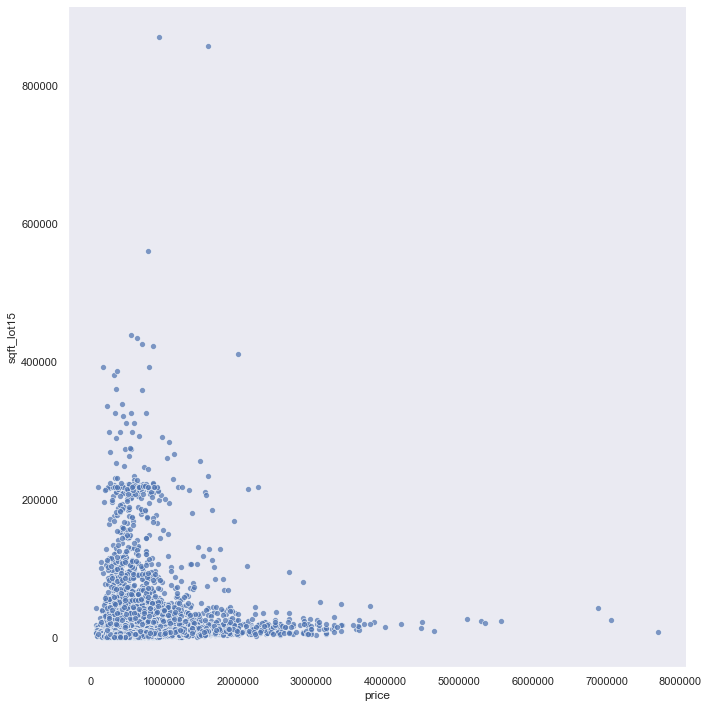

In [22]:
sns.set(style='dark')
sns.relplot(x='price',y='sqft_lot15', alpha=0.7,height=10,data=data)

In [23]:
data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

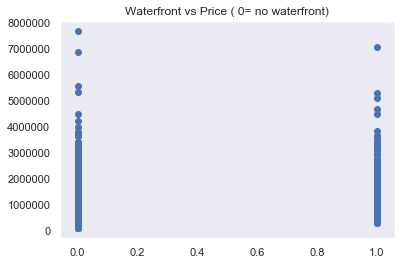

In [24]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

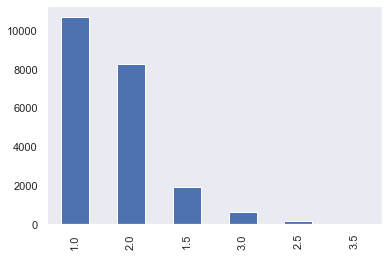

In [25]:
data.floors.value_counts().plot(kind='bar')

In [26]:
data['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

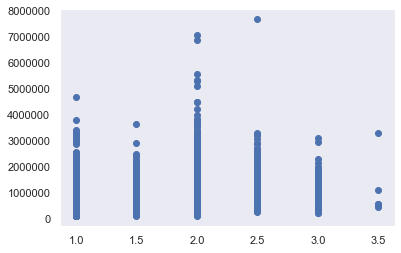

In [27]:
plt.scatter(data.floors,data.price)

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

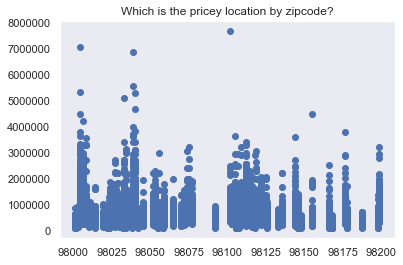

In [28]:
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode?")

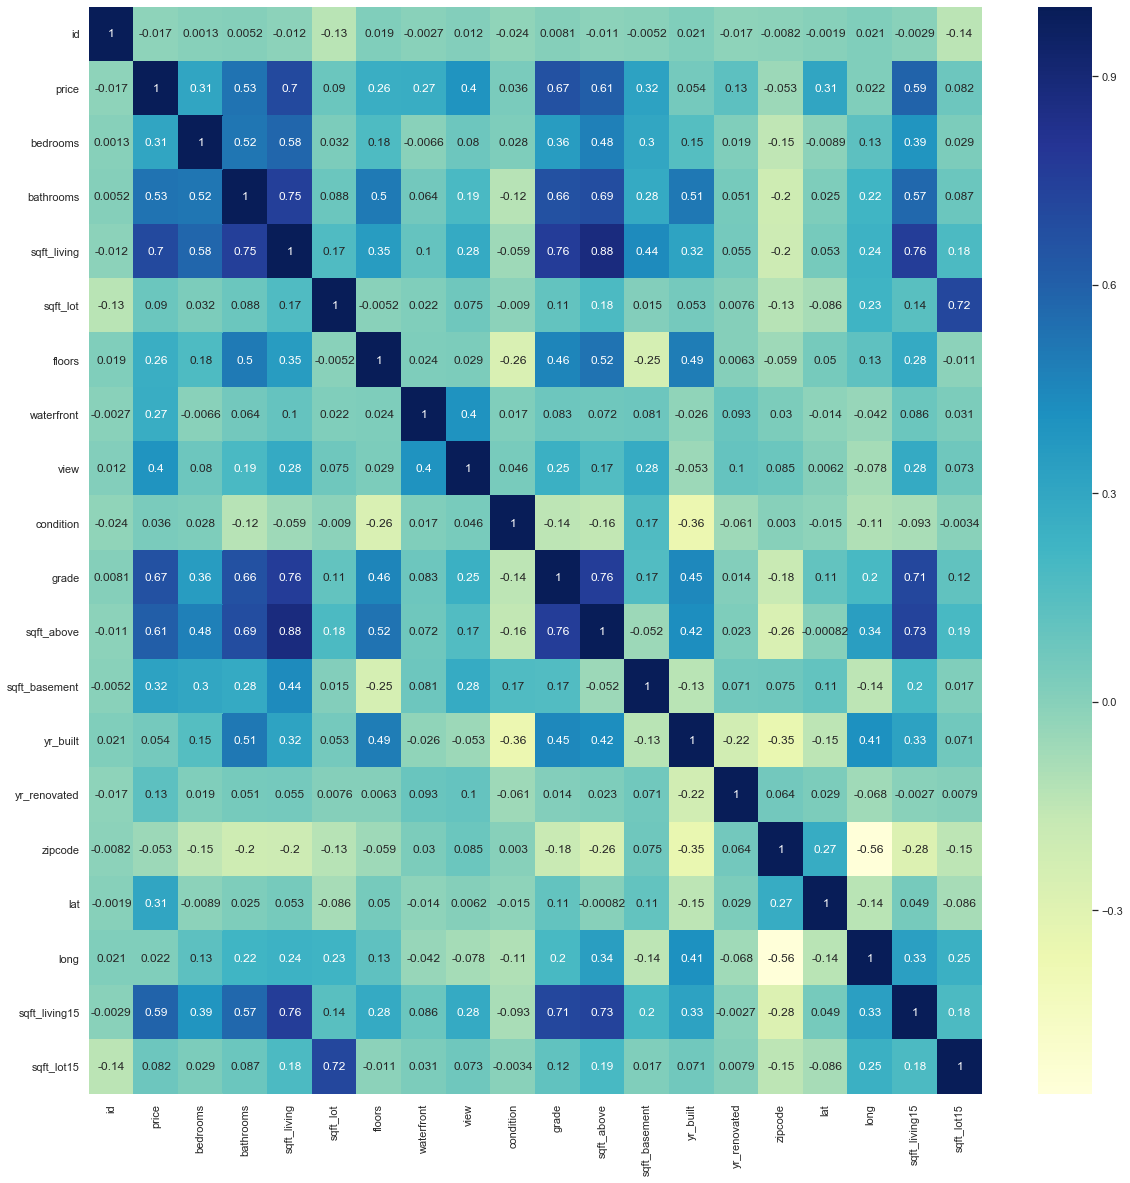

In [29]:
#heatmap for all the required features for correlation
data1=data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
     'sqft_living15', 'sqft_lot15']]
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data.corr(),cmap = 'YlGnBu',annot=True,ax=ax)

# By using Simple Linear Regression


For linear Regression, we are using linear_model from sklearn function.

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn.

We import train_test_split. This splits the data into required ratio (ex: 80–20), of which a certain ratio is considered for training the data, and the rest for testing the data. The data is trained to predict a line and then the test data is used to see if the line fits perfectly or not.

PolynomialFeatures generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

The metrics is imported as the metric module implements functions assessing prediction error for specific purposes.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [31]:
linreg = LinearRegression()

In [32]:
train1 = data.drop(['id', 'date'],axis=1)
train1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Here we splitting the data into 80:20 ratio of which train_size is 80%, test_size is 20%. train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state , you will get a different result, this is expected behavior. In order to get the same train ans test subsets we declare a random state. Here the x is ‘sqft_living’ and y is ‘price’. We are reshaping the x_train and y_train and the data is fitted. The x_test and y_test are used to predict the accuracy of the model. Here first we are calculating the squared mean error of y_test. The squared mean error for training and test are found. The intercept and coefficient of the line are found.

In [33]:
train_data,test_data=train_test_split(train1,train_size=0.8,random_state=3)
linreg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
linreg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=linreg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(linreg.score(x_train,y_train),3))
print('R sqaured testing',round(linreg.score(x_test,y_test),3) )
print('intercept',linreg.intercept_)
print('coefficient',linreg.coef_)

linear model
Sqaured mean error 254289.15
R squared training 0.492
R sqaured testing 0.496
intercept [-47235.8113029]
coefficient [[282.2468152]]


## R-squared testing: 0.496

A scatterplot graph is plotted for x_test, y_test. The data is spread over the graph. Now the line obtained from above is plotted to see how it fits for the data.

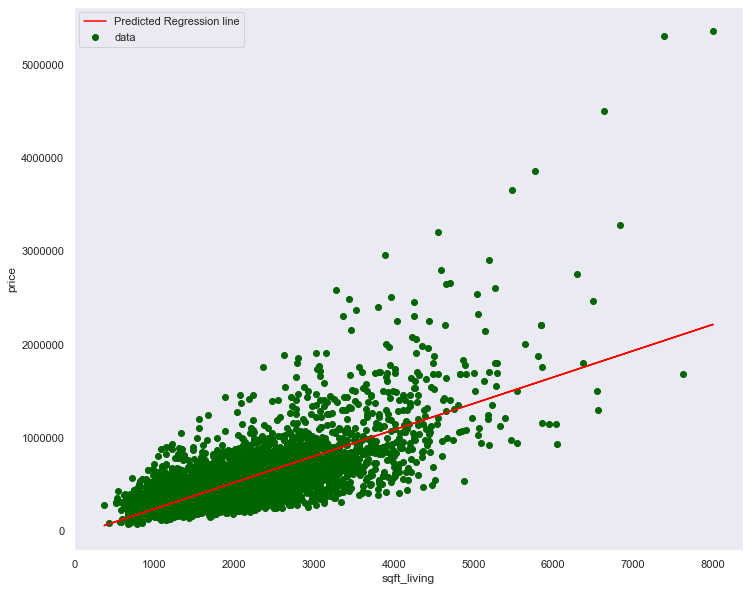

In [34]:
fig, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, linreg.predict(x_test), color='red', label= 'Predicted Regression line')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()

Here we are splitting the data in 80:20 ratio, of which train_size is 80% and test_size is 20%. Here x is ‘grade’ and y is ‘price’. We are reshaping the x_train and y_train and the data is fitted. The x_test and y_test are used to predict the accuracy of the model. Here first we are calculating the squared mean error of y_test. The squared mean error for training and test are found. The intercept and coefficient of the line are found.

In [35]:
train_data,test_data=train_test_split(train1,train_size=0.8,random_state=3)
linreg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
linreg.fit(x_train,y_train)

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=linreg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(linreg.score(x_train,y_train),3))
print('R squared testing',round(linreg.score(x_test,y_test),3))
print('intercept',linreg.intercept_)
print('coeeficient',linreg.coef_)

linear model
squared mean error 263387.61
R squared training 0.442
R squared testing 0.46
intercept [-1061459.62144314]
coeeficient [[209225.48270386]]


## R-squared testing: 0.46

A scatterplot graph is plotted for x_test, y_test. The data is spread over the graph. Now the line obtained from above is plotted to see how it fits for the data.

The boxplot is plotted for ‘grade’, ‘bedrooms’ and ‘bathrooms’ with respective to ‘price’.

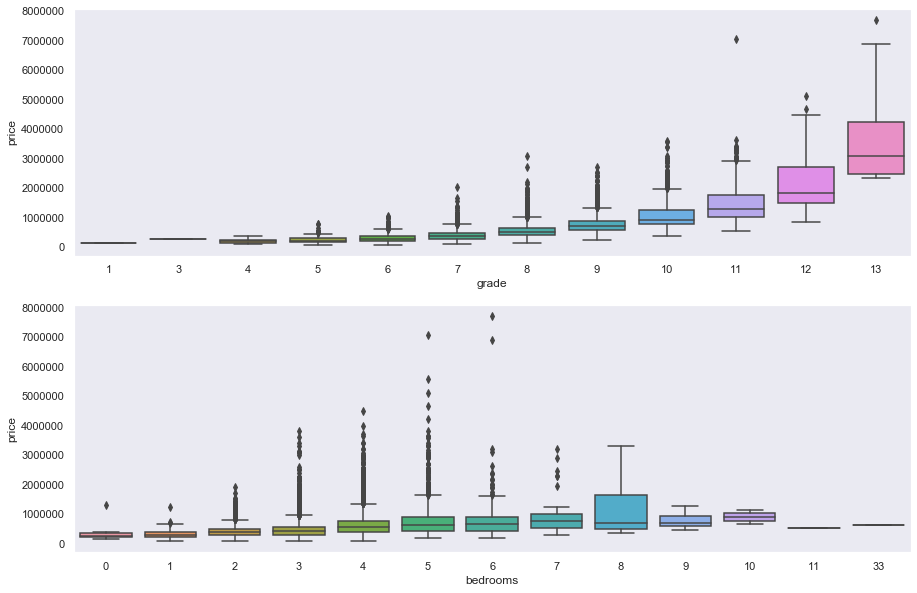

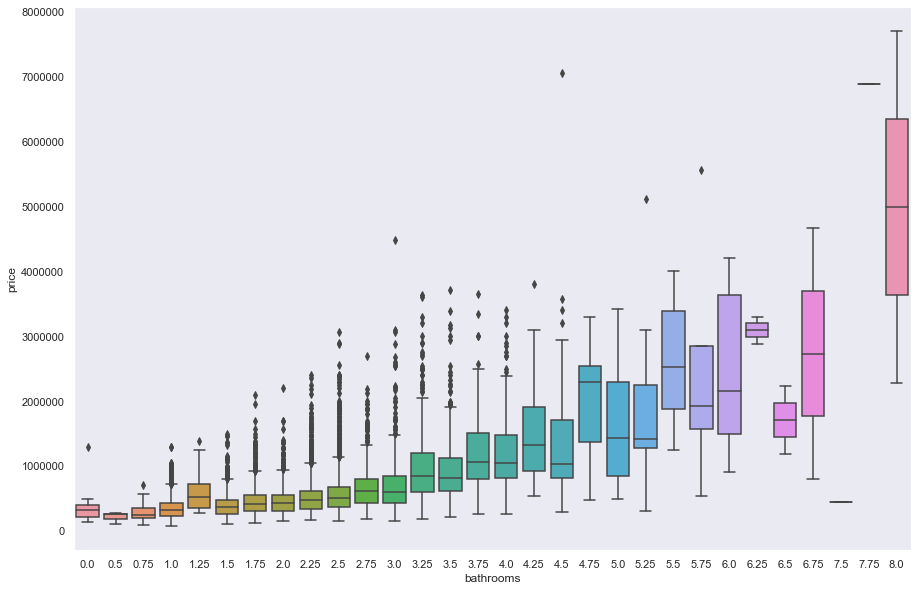

In [36]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])

The features we are considering are ‘bedrooms’, ‘grade’, ‘sqft_living’ and ‘sqft_above’. These are considered are one feature namely features1. Now the data is fitted into the model and test_data of features1 are used for prediction. Mean squared error is calculated for y_test. The mean squared error is rounded of upto 2 decimals. R squared error for both training and test is calculated. The intercept of the line is calculated along with coefficient of individual feature.

In [37]:
features1=['bedrooms','grade','sqft_living','sqft_above']
linreg=linear_model.LinearRegression()
linreg.fit(train_data[features1],train_data['price'])
pred = linreg.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(linreg.score(train_data[features1],train_data['price']),3))
print('R squared training', round(linreg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', linreg.intercept_)
print('Coefficient:', linreg.coef_)

complex_model 1
mean squared error(MSE) 239014.4
R squared training 0.548
R squared training 0.555
Intercept:  -523645.7841467742
Coefficient: [-4.33050242e+04  1.03455986e+05  2.73023590e+02 -8.38875593e+01]


The features we are considering are ‘bedrooms’, ’bathrooms’, ’sqft_living’, ’sqft_lot’, ’floors’, ’waterfront’, ’view’, ’grade’, ’sqft_above’, ’sqft_basement’, ’lat’,’sqft_living15'. These are considered are one feature namely features2. Now the data is fitted into the model and test_data of features2 are used for prediction. Mean squared error is calculated for y_test. The mean squared error is rounded of upto 2 decimals. R squared error for both training and test is calculated. The intercept of the line is calculated along with coefficient of individual feature.

In [38]:
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
linreg= linear_model.LinearRegression()
linreg.fit(train_data[features2],train_data['price'])
pred = linreg.predict(test_data[features2])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(linreg.score(train_data[features2], train_data['price']), 3))
print('R-squared (testing) ', round(linreg.score(test_data[features2], test_data['price']), 3))
print('Intercept: ', linreg.intercept_)
print('Coefficient:', linreg.coef_)

Complex Model_2
Mean Squared Error (MSE)  205244.56
R-squared (training)  0.655
R-squared (testing)  0.672
Intercept:  -32330182.91167583
Coefficient: [-2.62100082e+04 -3.47626774e+03  1.32069090e+02 -1.31506101e-01
 -3.22608866e+04  5.65731080e+05  6.81843494e+04  8.17559446e+04
  6.62246805e+01  6.58444098e+01  6.71765072e+05  4.60648979e+00]


# Observation

Complex Model_2 gives us R-squared (testing) score of 0.672. From above reports, we can conclude that linear regression for features 2 is best solution.

### Polynomial Regression

This is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).

For degree=2, the linear modelis built. The mean squared error is calculated and r squared is found for training and testing.

In [39]:
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  221965.07
R-squared (training)  0.614
R-squared (testing)  0.616


In [40]:
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features2])
xtest_poly=polyfeat.fit_transform(test_data[features2])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_4')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_4
Mean Squared Error (MSE)  175814.11
R-squared (training)  0.758
R-squared (testing)  0.759


For degree=3, the linear model is built. The mean squared error is calculated and r squared is found for training and testing.

In [41]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('complex model_5')
mean_squared_error=metrics.mean_squared_error(test_data['price'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

complex model_5
Mean Squared Error (MSE)  226056.91
R-squared (training)  0.627
R-squared (testing)  0.602


In [42]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features2])
xtest_poly=polyfeat.fit_transform(test_data[features2])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('complex model_6')
mean_squared_error=metrics.mean_squared_error(test_data['price'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

complex model_6
Mean Squared Error (MSE)  207567.73
R-squared (training)  0.776
R-squared (testing)  0.664


# Observation

Complex Model_4 gives us R-squared (testing) score of 0.759. From above reports, we can conclude that Polynomial regression for degree=2 and for features 2 is best solution.